Disclaimer: The data were collected from the Taiwan Economic Journal for the years 1999to 2009.
Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.
Dataset description: It has 96 columns of data
The first attribute is Y, class label
X1 Cost of Interest-bearing Debt
X2 Cash Reinvestment Ratio
X3 Current Ratio
X4 Acid Test
X5 Interest Expenses/Total Revenue
X6 Total Liability/Equity Ratio
X7 Liability/Total Assets
X8 Interest-bearing Debt/Equity
X9 Contingent Liability/Equity
X10 Operating Income/Capital
…
X95 Return on Total Asset Growth
Task: You will use the Taiwanese Bankruptcy Prediction data set. The dataset correspondsto a
classification problem on which you need to make predictions on the basis of whetherthe company
can have a risk to bankrupt considering features in the dataset. You are asked to use this data to
build Bagging Classifier and Boosting Classifiers model.


In [22]:
import pandas as pd
import numpy as numpy
import copy
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 100
pd.options.display.max_rows= 100

In [12]:
import os

In [13]:
os.chdir(r'C:\Users\Fuad Hasanli\Downloads')

In [2]:

from warnings import filterwarnings
filterwarnings("ignore")

In [14]:
data = pd.read_csv('data - data.csv')

In [15]:
data.shape

(6819, 96)

# Data Understanding

In [17]:
df = copy.deepcopy(data)

In [23]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [7]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [8]:
list(df.columns)

['Bankrupt?',
 ' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Operating Gross Margin',
 ' Realized Sales Gross Margin',
 ' Operating Profit Rate',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Non-industry income and expenditure/revenue',
 ' Continuous interest rate (after tax)',
 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Cash flow rate',
 ' Interest-bearing debt interest rate',
 ' Tax rate (A)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Cash Flow Per Share',
 ' Revenue Per Share (Yuan ¥)',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' After-tax Net Profit Growth Rate',
 ' Regular Net Profit Growth Rate',
 ' C

In [24]:
df.columns = df.columns.str.lower().str.strip().str.replace(' ','_').str.replace('-','_')

In [26]:
list(df.columns)

['bankrupt?',
 'roa(c)_before_interest_and_depreciation_before_interest',
 'roa(a)_before_interest_and_%_after_tax',
 'roa(b)_before_interest_and_depreciation_after_tax',
 'operating_gross_margin',
 'realized_sales_gross_margin',
 'operating_profit_rate',
 'pre_tax_net_interest_rate',
 'after_tax_net_interest_rate',
 'non_industry_income_and_expenditure/revenue',
 'continuous_interest_rate_(after_tax)',
 'operating_expense_rate',
 'research_and_development_expense_rate',
 'cash_flow_rate',
 'interest_bearing_debt_interest_rate',
 'tax_rate_(a)',
 'net_value_per_share_(b)',
 'net_value_per_share_(a)',
 'net_value_per_share_(c)',
 'persistent_eps_in_the_last_four_seasons',
 'cash_flow_per_share',
 'revenue_per_share_(yuan_¥)',
 'operating_profit_per_share_(yuan_¥)',
 'per_share_net_profit_before_tax_(yuan_¥)',
 'realized_sales_gross_profit_growth_rate',
 'operating_profit_growth_rate',
 'after_tax_net_profit_growth_rate',
 'regular_net_profit_growth_rate',
 'continuous_net_profit_growth_

In [27]:
#imbalance check
df['bankrupt?'].value_counts()

bankrupt?
0    6599
1     220
Name: count, dtype: int64

In [28]:
df.shape

(6819, 96)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   bankrupt?                                                6819 non-null   int64  
 1   roa(c)_before_interest_and_depreciation_before_interest  6819 non-null   float64
 2   roa(a)_before_interest_and_%_after_tax                   6819 non-null   float64
 3   roa(b)_before_interest_and_depreciation_after_tax        6819 non-null   float64
 4   operating_gross_margin                                   6819 non-null   float64
 5   realized_sales_gross_margin                              6819 non-null   float64
 6   operating_profit_rate                                    6819 non-null   float64
 7   pre_tax_net_interest_rate                                6819 non-null   float64
 8   after_tax_net_interest_rate 

In [30]:
pd.DataFrame(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   bankrupt?                                                6819 non-null   int64  
 1   roa(c)_before_interest_and_depreciation_before_interest  6819 non-null   float64
 2   roa(a)_before_interest_and_%_after_tax                   6819 non-null   float64
 3   roa(b)_before_interest_and_depreciation_after_tax        6819 non-null   float64
 4   operating_gross_margin                                   6819 non-null   float64
 5   realized_sales_gross_margin                              6819 non-null   float64
 6   operating_profit_rate                                    6819 non-null   float64
 7   pre_tax_net_interest_rate                                6819 non-null   float64
 8   after_tax_net_interest_rate 

""


In [15]:
info_dict = {'column_name': [],
             'non_null_count': [],
             'data_type': []}

for col in df.columns:
    info_dict['column_name'].append(col)
    info_dict['non_null_count'].append(df[col].count())
    info_dict['data_type'].append(str(df[col].dtype))

df_info = pd.DataFrame(info_dict, columns=['column_name', 'non_null_count', 'data_type'])
df_info


,column_name,non_null_count,data_type
0,bankrupt?,6819,int64
1,roa(c)_before_interest_and_depreciation_before...,6819,float64
2,roa(a)_before_interest_and_%_after_tax,6819,float64
3,roa(b)_before_interest_and_depreciation_after_tax,6819,float64
4,operating_gross_margin,6819,float64
5,realized_sales_gross_margin,6819,float64
6,operating_profit_rate,6819,float64
7,pre_tax_net_interest_rate,6819,float64
8,after_tax_net_interest_rate,6819,float64
9,non_industry_income_and_expenditure/revenue,6819,float64


In [31]:
df.isna().sum().sum()

0

In [32]:
df.isnull().any()

bankrupt?                                                  False
roa(c)_before_interest_and_depreciation_before_interest    False
roa(a)_before_interest_and_%_after_tax                     False
roa(b)_before_interest_and_depreciation_after_tax          False
operating_gross_margin                                     False
realized_sales_gross_margin                                False
operating_profit_rate                                      False
pre_tax_net_interest_rate                                  False
after_tax_net_interest_rate                                False
non_industry_income_and_expenditure/revenue                False
continuous_interest_rate_(after_tax)                       False
operating_expense_rate                                     False
research_and_development_expense_rate                      False
cash_flow_rate                                             False
interest_bearing_debt_interest_rate                        False
tax_rate_(a)             

In [33]:
df.isnull().any().any()

False

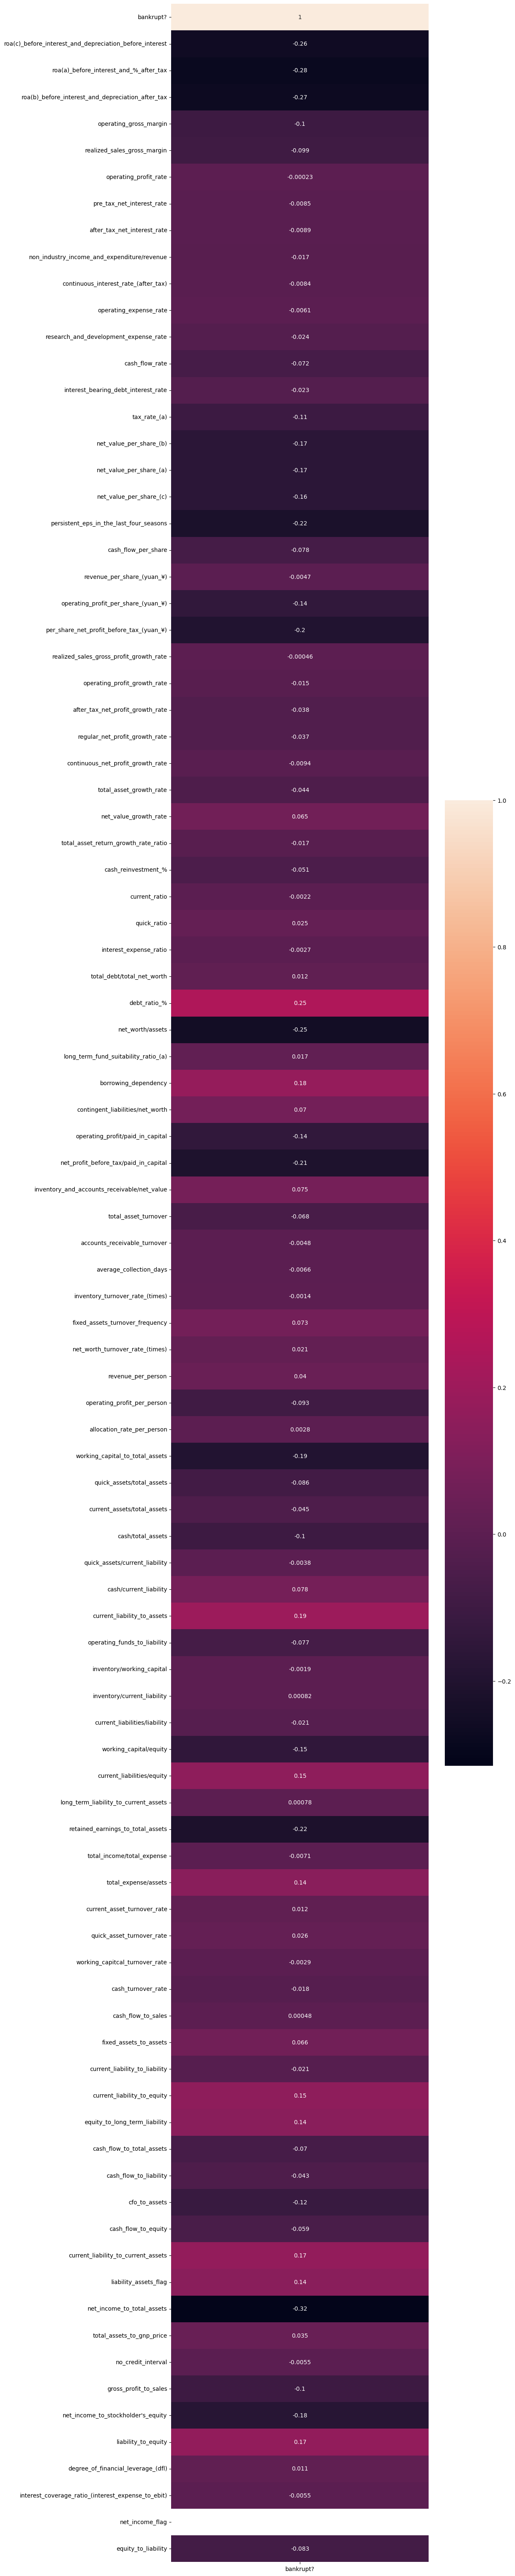

In [34]:
# Bankrupt? correlation with other columns, correlation with only target
plt.figure(figsize=(10, 80))
sns.heatmap(df.corr().iloc[:, [0]], annot=True)
plt.show()


In [20]:
# net income flag correlation nan? - handle it
df.corr().iloc[:, [0]]

,bankrupt?
bankrupt?,1.000000
roa(c)_before_interest_and_depreciation_before_interest,-0.260807
roa(a)_before_interest_and_%_after_tax,-0.282941
roa(b)_before_interest_and_depreciation_after_tax,-0.273051
operating_gross_margin,-0.100043
realized_sales_gross_margin,-0.099445
operating_profit_rate,-0.000230
pre_tax_net_interest_rate,-0.008517
after_tax_net_interest_rate,-0.008857
non_industry_income_and_expenditure/revenue,-0.016593


In [35]:
df['net_income_flag'].nunique()

1

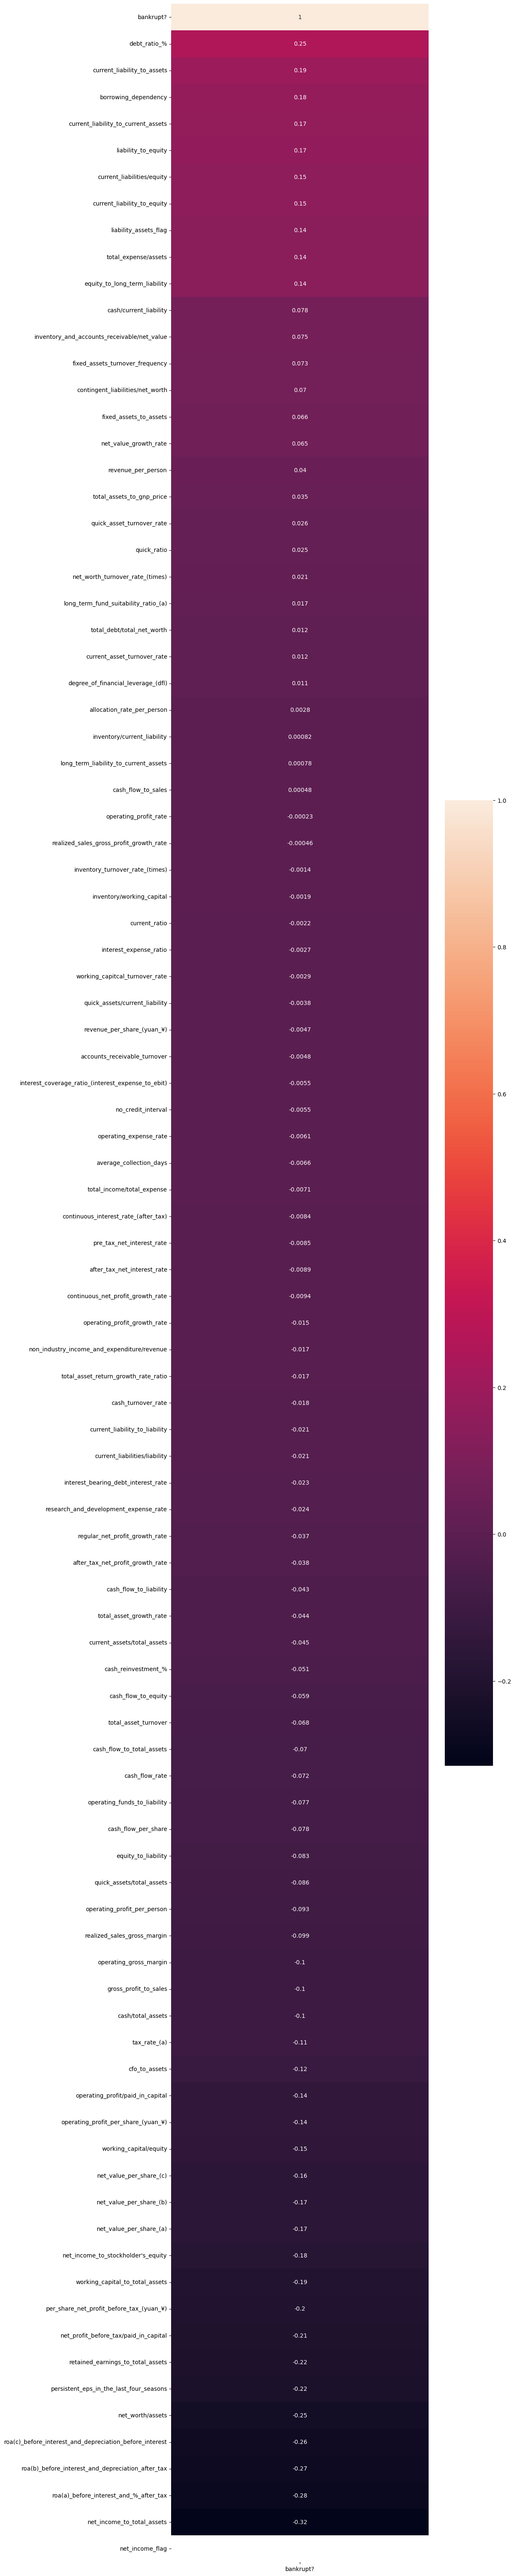

In [37]:
# Sorted correlations
plt.figure(figsize=(10, 80))
sns.heatmap(df.corr().iloc[:, [0]].sort_values(by='bankrupt?', ascending=False), annot=True)
plt.show()


In [38]:
df['net_income_flag'].unique()

array([1], dtype=int64)

In [42]:
df['net_income_flag'].value_counts()

net_income_flag
1    6819
Name: count, dtype: int64

In [43]:
df.nunique()
# liability_assests_flag - handle it

bankrupt?                                                     2
roa(c)_before_interest_and_depreciation_before_interest    3333
roa(a)_before_interest_and_%_after_tax                     3151
roa(b)_before_interest_and_depreciation_after_tax          3160
operating_gross_margin                                     3781
realized_sales_gross_margin                                3788
operating_profit_rate                                      3376
pre_tax_net_interest_rate                                  3789
after_tax_net_interest_rate                                3604
non_industry_income_and_expenditure/revenue                2551
continuous_interest_rate_(after_tax)                       3617
operating_expense_rate                                     2966
research_and_development_expense_rate                      1536
cash_flow_rate                                             5557
interest_bearing_debt_interest_rate                        1080
tax_rate_(a)                            

In [44]:
df['liability_assets_flag'].value_counts()

liability_assets_flag
0    6811
1       8
Name: count, dtype: int64

# Data Preprocessing


In [45]:
# Drop liability_assets_flag, net_income_flag columns, becaause there are not help us
df.drop(columns=['liability_assets_flag', 'net_income_flag'], axis=1, inplace=True)

In [46]:
# Separate features and target
X = df.drop('bankrupt?', axis=1)
y = df['bankrupt?']

In [47]:
# Imbalance check
y.value_counts()

bankrupt?
0    6599
1     220
Name: count, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=101, shuffle=True, stratify=y
)

In [49]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((4773, 93), (2046, 93), (4773,), (2046,))

In [51]:
X_train = copy.deepcopy(X_train_scaled)

In [34]:
X_test = copy.deepcopy(X_test_scaled)

# Bagging Classifier

# Decision Tree

In [52]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


In [83]:
bagging_DT_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42), #base_estimator sklearn versiyasina gore deyisir, versiyaya gore cixan errorlari nezere almaq lazimdi
    n_estimators=150,
    max_samples=0.5, # 50 faiz sample goturur
    max_features=8, # 8 column goturur her defe
    bootstrap=True, #her setiri yerine qaytarir yeniden secir
    bootstrap_features=True, #her sutunu yerine qaytarir yeniden secir
    n_jobs=-1, # kompdaki CPU corelarinin hamisini isledir
    random_state=101
)

In [84]:
bagging_DT_model.fit(X_train, y_train)

BaggingClassifier(bootstrap_features=True,
                  estimator=DecisionTreeClassifier(random_state=42),
                  max_features=8, max_samples=0.5, n_estimators=150, n_jobs=-1,
                  random_state=101)

In [85]:
bagging_DT_model.score(X_test, y_test)

C:\Users\Fuad Hasanli\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


0.967741935483871

In [86]:
bagging_DT_model_pred = bagging_DT_model.predict(X_test)

C:\Users\Fuad Hasanli\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


Evaluation

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, bagging_DT_model_pred)

0.967741935483871

In [88]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

print("Confusion Matrix:\n", confusion_matrix(y_test, bagging_DT_model_pred))

print(classification_report(y_test, bagging_DT_model_pred))

print("\nAccuracy score:", accuracy_score(y_test, bagging_DT_model_pred),
      "\nPrecision score:", precision_score(y_test, bagging_DT_model_pred),
      "\nRecall score:", recall_score(y_test, bagging_DT_model_pred),
      "\nF1 score:", f1_score(y_test, bagging_DT_model_pred))

# TN  FP
# FN  TP

Confusion Matrix:
 [[1980    0]
 [  66    0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1980
           1       0.00      0.00      0.00        66

    accuracy                           0.97      2046
   macro avg       0.48      0.50      0.49      2046
weighted avg       0.94      0.97      0.95      2046


Accuracy score: 0.967741935483871 
Precision score: 0.0 
Recall score: 0.0 
F1 score: 0.0


C:\Users\Fuad Hasanli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Fuad Hasanli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Fuad Hasanli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Fuad Hasan

# Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
bagging_Log_model = BaggingClassifier(
    estimator=LogisticRegression(random_state=42),
    n_estimators=150,
    max_samples=0.4,
    max_features=12,
    bootstrap=True,
    bootstrap_features=True,
    n_jobs=-1,
    random_state=42
)

In [97]:
bagging_Log_model.fit(X_train, y_train)

BaggingClassifier(bootstrap_features=True,
                  estimator=LogisticRegression(random_state=42),
                  max_features=12, max_samples=0.4, n_estimators=150, n_jobs=-1,
                  random_state=42)

In [98]:
bagging_Log_model_pred = bagging_Log_model.predict(X_test)

C:\Users\Fuad Hasanli\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


Evaluation

In [99]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, bagging_Log_model_pred)

0.967741935483871

In [100]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

print("Confusion Matrix:\n", confusion_matrix(y_test, bagging_Log_model_pred))

print(classification_report(y_test, bagging_Log_model_pred))

print("\nAccuracy score:", accuracy_score(y_test, bagging_Log_model_pred),
      "\nPrecision score:", precision_score(y_test, bagging_Log_model_pred),
      "\nRecall score:", recall_score(y_test, bagging_Log_model_pred),
      "\nF1 score:", f1_score(y_test, bagging_Log_model_pred))

# TN  FP
# FN  TP

Confusion Matrix:
 [[1980    0]
 [  66    0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1980
           1       0.00      0.00      0.00        66

    accuracy                           0.97      2046
   macro avg       0.48      0.50      0.49      2046
weighted avg       0.94      0.97      0.95      2046


Accuracy score: 0.967741935483871 
Precision score: 0.0 
Recall score: 0.0 
F1 score: 0.0


C:\Users\Fuad Hasanli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Fuad Hasanli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Fuad Hasanli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Fuad Hasan

# KNN

In [101]:
from sklearn.neighbors import KNeighborsClassifier

bagging_KNN_model = BaggingClassifier(
    estimator=KNeighborsClassifier(n_neighbors=7),
    n_estimators=100,
    max_samples=0.7,
    max_features=30,
    bootstrap=True,
    bootstrap_features=True,
    n_jobs=-1,
    random_state=42
)

bagging_KNN_model.fit(X_train, y_train)


BaggingClassifier(bootstrap_features=True,
                  estimator=KNeighborsClassifier(n_neighbors=7),
                  max_features=30, max_samples=0.7, n_estimators=100, n_jobs=-1,
                  random_state=42)

In [102]:
bagging_KNN_model.score(X_test, y_test)

C:\Users\Fuad Hasanli\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


0.967741935483871

In [103]:
bagging_KNN_model_pred = bagging_KNN_model.predict(X_test)

C:\Users\Fuad Hasanli\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


In [104]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

print("Confusion Matrix:\n", confusion_matrix(y_test, bagging_KNN_model_pred))

print(classification_report(y_test, bagging_KNN_model_pred))

print("\nAccuracy score:", accuracy_score(y_test, bagging_KNN_model_pred),
      "\nPrecision score:", precision_score(y_test, bagging_KNN_model_pred),
      "\nRecall score:", recall_score(y_test, bagging_KNN_model_pred),
      "\nF1 score:", f1_score(y_test, bagging_KNN_model_pred))

# TN  FP
# FN  TP

Confusion Matrix:
 [[1980    0]
 [  66    0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1980
           1       0.00      0.00      0.00        66

    accuracy                           0.97      2046
   macro avg       0.48      0.50      0.49      2046
weighted avg       0.94      0.97      0.95      2046


Accuracy score: 0.967741935483871 
Precision score: 0.0 
Recall score: 0.0 
F1 score: 0.0


C:\Users\Fuad Hasanli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Fuad Hasanli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Fuad Hasanli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Fuad Hasan

# Gradient Boosting Classifier

In [105]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Classifier
model_GBC = GradientBoostingClassifier(
    learning_rate=0.01,
    max_features=20,
    random_state=101
)


In [106]:
model_GBC.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_features=20,
                           random_state=101)

In [107]:
model_GBC.score(X_train, y_train)

0.9721349256232977

In [108]:
GBC_pred = model_GBC.predict(X_test)

C:\Users\Fuad Hasanli\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


Evaluation

In [109]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

print("Confusion Matrix:\n", confusion_matrix(y_test, GBC_pred))

print(classification_report(y_test, GBC_pred))

print("\nAccuracy score:", accuracy_score(y_test, GBC_pred),
      "\nPrecision score:", precision_score(y_test, GBC_pred),
      "\nRecall score:", recall_score(y_test, GBC_pred),
      "\nF1 score:", f1_score(y_test, GBC_pred))

# TN  FP
# FN  TP

Confusion Matrix:
 [[1980    0]
 [  66    0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1980
           1       0.00      0.00      0.00        66

    accuracy                           0.97      2046
   macro avg       0.48      0.50      0.49      2046
weighted avg       0.94      0.97      0.95      2046


Accuracy score: 0.967741935483871 
Precision score: 0.0 
Recall score: 0.0 
F1 score: 0.0


C:\Users\Fuad Hasanli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Fuad Hasanli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Fuad Hasanli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Fuad Hasan

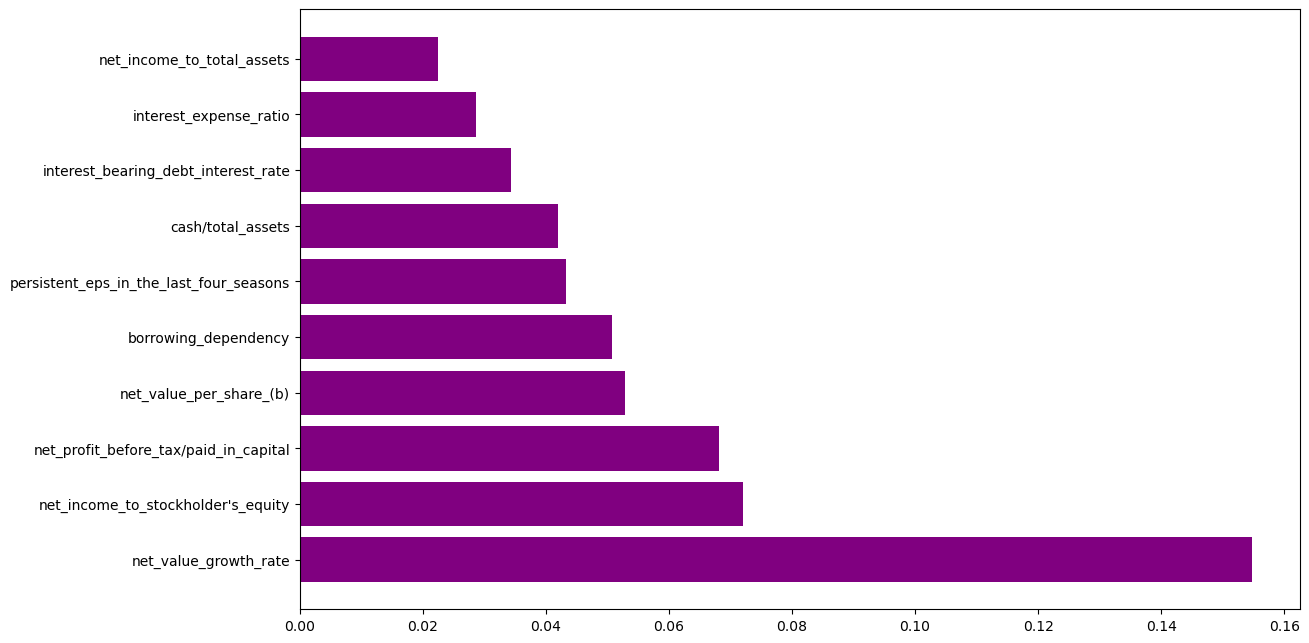

In [110]:
# Column names -> index, importance number of columns
importance = pd.DataFrame(
    {"Features": model_GBC.feature_importances_},
    index=df.drop(columns=['bankrupt?'], axis=1).columns
)

# Sort by importance - Descending
importance_sorted = importance.sort_values(by="Features", axis=0, ascending=False)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0, 0, 1, 1])

# Show top 10 most important columns
ax.barh(importance_sorted.index[:10], importance_sorted.Features[:10], color="purple")
plt.show()

#General question: Is it reasonable that the model depends on one feature?

# XGBoost classifier

In [111]:
df['bankrupt?'].value_counts()

bankrupt?
0    6599
1     220
Name: count, dtype: int64

In [112]:
from xgboost import XGBClassifier

p = 6599 / 220  # Calculating the imbalance ratio
model_XGB = XGBClassifier(
    learning_rate=0.03,
    scale_pos_weight=p,
    random_state=42
)


In [113]:
model_XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [114]:
model_XGB.score(X_test, y_test)

0.967741935483871

In [115]:
model_XGB_pred  = model_XGB.predict(X_test)

Evaluation

In [116]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

print("Confusion Matrix:\n", confusion_matrix(y_test, model_XGB_pred))

print(classification_report(y_test, model_XGB_pred))

print("\nAccuracy score:", accuracy_score(y_test, model_XGB_pred),
      "\nPrecision score:", precision_score(y_test, model_XGB_pred),
      "\nRecall score:", recall_score(y_test, model_XGB_pred),
      "\nF1 score:", f1_score(y_test, model_XGB_pred))

# TN  FP
# FN  TP

Confusion Matrix:
 [[1980    0]
 [  66    0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1980
           1       0.00      0.00      0.00        66

    accuracy                           0.97      2046
   macro avg       0.48      0.50      0.49      2046
weighted avg       0.94      0.97      0.95      2046


Accuracy score: 0.967741935483871 
Precision score: 0.0 
Recall score: 0.0 
F1 score: 0.0


C:\Users\Fuad Hasanli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Fuad Hasanli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Fuad Hasanli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Fuad Hasan

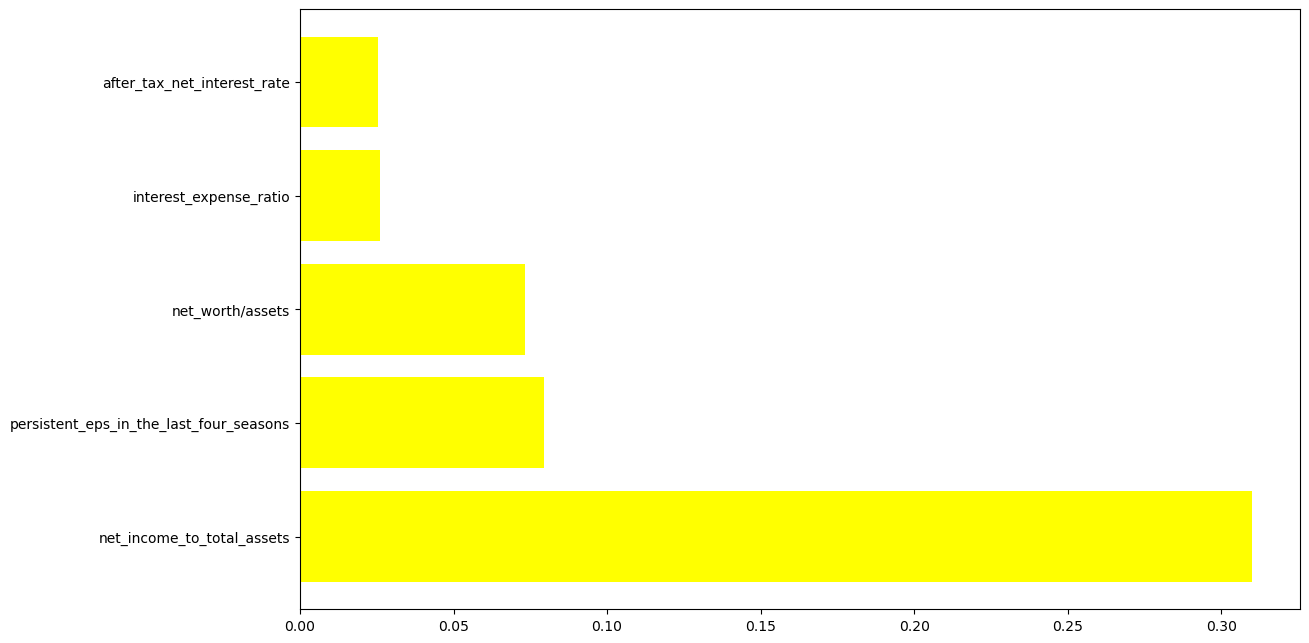

In [117]:
importance = pd.DataFrame(
    {"Features": model_XGB.feature_importances_},
    index=df.drop(columns=['bankrupt?'], axis=1).columns
)

# Sort by importance - Descending
importance_sorted = importance.sort_values(by="Features", axis=0, ascending=False)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0, 0, 1, 1])

# Show top 10 most important columns
ax.barh(importance_sorted.index[:5], importance_sorted.Features[:5], color="yellow")
plt.show()

# CAT Boost classifier

In [122]:
!pip install lightgbm

In [121]:
from catboost import CatBoostClassifier

# CatBoost Classifier
model_CBR = CatBoostClassifier(
    learning_rate=0.05,
    iterations=100,
    scale_pos_weight=df['bankrupt?'].value_counts()[0] / df['bankrupt?'].value_counts()[1],
    verbose=5,
    random_state=101
)

ModuleNotFoundError: No module named 'catboost'

In [ ]:
model_CBR.fit(X_train, y_train)

In [ ]:
model_CBR.score(X_test, y_test)

In [ ]:
model_CBR_preds = model_CBR.predict(X_test)

Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

print("Confusion Matrix:\n", confusion_matrix(y_test, model_CBR_preds))

print(classification_report(y_test, model_CBR_preds))

print("\nAccuracy score:", accuracy_score(y_test, model_CBR_preds),
      "\nPrecision score:", precision_score(y_test, model_CBR_preds),
      "\nRecall score:", recall_score(y_test, model_CBR_preds),
      "\nF1 score:", f1_score(y_test, model_CBR_preds))

# TN  FP
# FN  TP

In [ ]:
importance = pd.DataFrame(
    {"Features": model_CBR.feature_importances_},
    index=df.drop(columns=['bankrupt?'], axis=1).columns
)

# Sort by importance - Descending
importance_sorted = importance.sort_values(by="Features", axis=0, ascending=False)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0, 0, 1, 1])

# Show top 10 most important columns
ax.barh(importance_sorted.index[:5], importance_sorted.Features[:5], color="black")
plt.show()

# LightGBM

In [123]:
!pip install lightgbm

In [125]:
import lightgbm as lgb

# Define parameters for LightGBM
lgb_params = {
    'learning_rate': 0.03,
    'max_depth': 12, #agaclarin bolunme sayi
    'num_leaves': 24, #yarpaqlarin sayib
    'num_iterations': 1000,
    'scale_pos_weight': df['bankrupt?'].value_counts()[0] / df['bankrupt?'].value_counts()[1]
}

# Initialize the LightGBM model
lgb_model = lgb.LGBMClassifier(**lgb_params)


In [126]:
lgb_model.fit(X_train, y_train, eval_set=(X_test, y_test))

C:\Users\Fuad Hasanli\anaconda3\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 154, number of negative: 4619
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23714
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 93
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.032265 -> initscore=-3.400981
[LightGBM] [Info] Start training from score -3.400981
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

LGBMClassifier(learning_rate=0.03, max_depth=12, num_iterations=1000,
               num_leaves=24, scale_pos_weight=29.995454545454546)

In [127]:
lgb_model.score(X_test, y_test)

0.967741935483871

In [128]:
lgb_model_pred = lgb_model.predict(X_test)

In [129]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

print("Confusion Matrix:\n", confusion_matrix(y_test, lgb_model_pred))

print(classification_report(y_test, lgb_model_pred))

print("\nAccuracy score:", accuracy_score(y_test, lgb_model_pred),
      "\nPrecision score:", precision_score(y_test, lgb_model_pred),
      "\nRecall score:", recall_score(y_test, lgb_model_pred),
      "\nF1 score:", f1_score(y_test, lgb_model_pred))

# TN  FP
# FN  TP

Confusion Matrix:
 [[1980    0]
 [  66    0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1980
           1       0.00      0.00      0.00        66

    accuracy                           0.97      2046
   macro avg       0.48      0.50      0.49      2046
weighted avg       0.94      0.97      0.95      2046


Accuracy score: 0.967741935483871 
Precision score: 0.0 
Recall score: 0.0 
F1 score: 0.0


C:\Users\Fuad Hasanli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Fuad Hasanli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Fuad Hasanli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Fuad Hasan

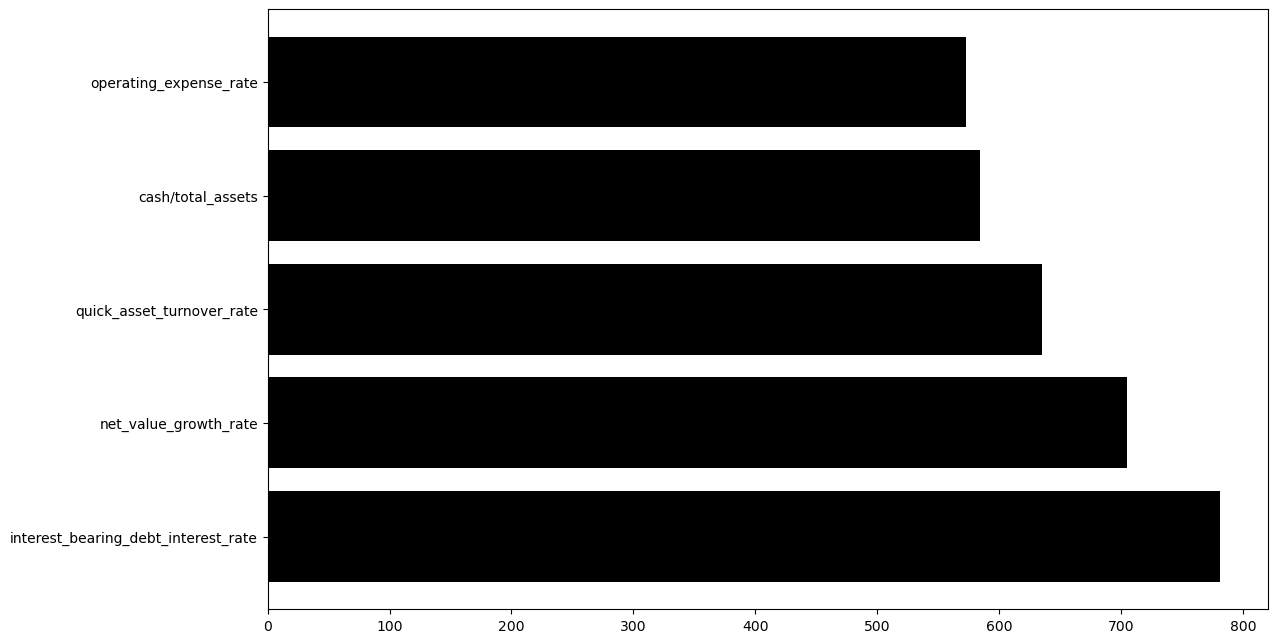

In [130]:
importance = pd.DataFrame(
    {"Features": lgb_model.feature_importances_},
    index=df.drop(columns=['bankrupt?'], axis=1).columns
)

# Sort by importance - Descending
importance_sorted = importance.sort_values(by="Features", axis=0, ascending=False)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0, 0, 1, 1])

# Show top 10 most important columns
ax.barh(importance_sorted.index[:5], importance_sorted.Features[:5], color="black")
plt.show()